In [3]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
%matplotlib inline

# Generalized Inverse

In [26]:
def T_func(x):
    if (x>=0)&(x<1):
        re = x**2
    elif (x<2):
        re = 1
    else:
        re = x**2+1
    return re

In [27]:
T_func(2)

5

In [96]:
x = np.linspace(0, 3, 1000)
y = np.array([T_func(t) for t in x])

In [98]:
def gen_inv(y, feature, func):
    return feature[np.argmax(func>=y)]

In [99]:
y1 = np.linspace(0, 10, 1000)
x1 = np.array([gen_inv(z, x, y) for z in y1])

In [145]:
y[np.where(np.diff(y)>=0.5)] = np.nan
x1[np.where(np.diff(x1)>=1.5)] = np.nan

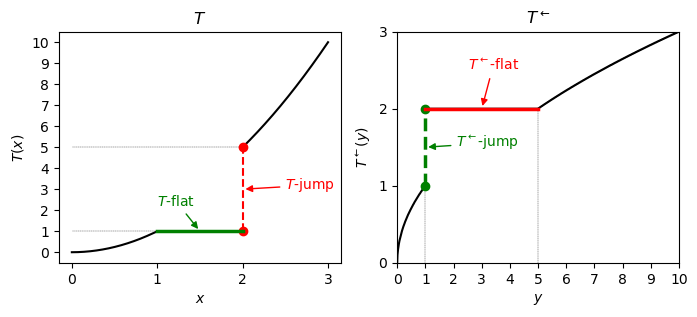

In [294]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.set_title('$T$')
ax1.plot(x, y, 'k-')
plt.xlim([0,3])
plt.ylim([0,10])
ax1.set_xlabel("$x$")
ax1.set_ylabel("$T(x)$")
ax1.set_yticks(np.arange(0, 11, step=1))
ax1.plot([2,0], [5,5], 'k--', lw=0.25)
ax1.plot([2,0], [1.0,1.0], 'k--', lw=0.25)
ax1.plot([2,2], [1,5], 'r--o')
ax1.plot([1,2], [1,1], 'g-', lw=2.5)
ax1.annotate("$T$-flat", xy=(1.5, 1), xytext=(1.0, 2.2), color='green',
            arrowprops=dict(arrowstyle="-|>", color='g'))
ax1.annotate("$T$-jump", xy=(2,3), xytext = (2.5, 3), color="r",
             arrowprops=dict(arrowstyle='-|>', color="r"))
####
ax2.set_title('$T^{\leftarrow}$')
ax2.plot(y1, x1, 'k-')
ax2.plot([1,1], [1,0], 'k--', lw=0.25)
ax2.plot([5,5], [0,2], 'k--', lw=0.25)
ax2.plot([1,1], [1,2], 'g--o', linewidth=2.5)
ax2.plot([1,5], [2,2], 'r-', lw=2.5)
ax2.set_xlim([0,10])
ax2.set_ylim([0,3])
ax2.set_xticks(np.arange(0, 11, step=1))
ax2.set_yticks(np.arange(0, 4, step=1))
ax2.set_ylabel("$T^{\leftarrow}(y)$")
ax2.set_xlabel("$y$")
ax2.annotate("$T^{\leftarrow}$-flat", xy=(3,2), xytext=(2.5,2.5),color="r",
            arrowprops=dict(arrowstyle='-|>', color="r"))
ax2.annotate("$T^{\leftarrow}$-jump", xy=(1,1.5), xytext=(2.1,1.5),color="g",
            arrowprops=dict(arrowstyle="-|>", color="green"))
fig.savefig('figs/gen_inv.png', bbox_inches='tight') # to make x lables appear

In [1]:
#np.where(np.diff(y)>=.5)

# Frechet Bounds and Fundamental Copulae

Frechet bounds:

$ \max \left(0, \sum_{i=1}^d u_i +1 - d\right) \le C(u_1,...,u_d) \le \min (u_1,...,u_d) $

In [39]:
# plot the bounds

def frechet_upper(u, v):
    return np.minimum(u, v)

def frechet_lower(u, v):
    return np.maximum(0, u+v-1)

def independence_copula(u, v):
    return u*v

In [40]:
u = np.linspace(0, 1, 20)
#v = np.linspace(0, 1, 20)
U, V = np.meshgrid(u, u)
W = np.c_[U.ravel(), V.ravel()]
up = frechet_upper(W[:,0], W[:,1]).reshape(20,20)
low  = frechet_lower(W[:,0], W[:,1]).reshape(20,20)
ind_copula = independence_copula(W[:, 0], W[:, 1]).reshape(20, 20)

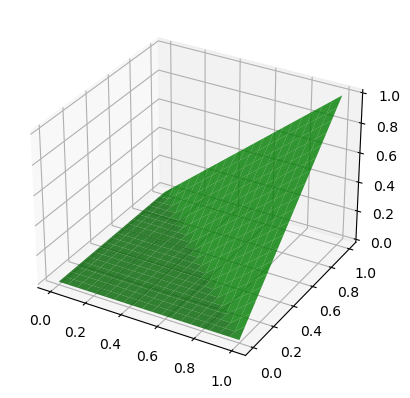

In [38]:
ax = plt.axes(projection='3d')
#Z = X**2 + Y**2
#ax.plot_surface(U, V, up, alpha=0.9, color='b')
ax.plot_surface(U, V, low, alpha=0.8, color='g')
#ax.view_init(-15, 130)

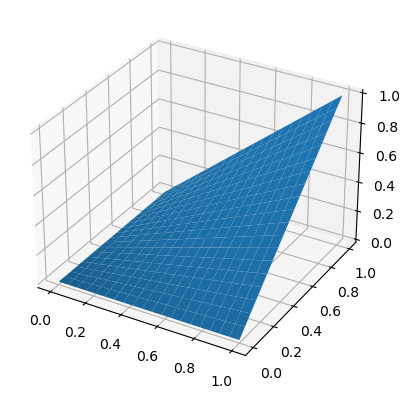

In [42]:
ax = plt.axes(projection='3d')
ax.plot_surface(U, V, ind_copula)

<font color=red> TODO: 1) Plot different bounds, then focus on the special copulae.

# Simulation  

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [236]:
class abc():
    def __init__(self, u):
        self.st = u
        
    def __call__(self, x):
        return x**2


In [239]:
a = abc(20)
a.st

20

In [240]:
a(10)

100

In [259]:
import numpy as np

In [312]:
class parent():
    def __init__(self, x):
        self.__x = x
        self.__y = x**2
    
    @property
    def _x(self):
        return self.__x
    @_x.setter
    def _x(self, u):
        self.__x = u
    def __call__(self, z):
        self._z = z
        print('This is a test!')
        return self.call(z)

In [313]:
class child(parent):
    def __init__(self, x):
        super().__init__(x)
    def call(self, u):
        return (np.exp(u) - 1)/u       

In [314]:
test = child(10)

In [315]:
test._x=20

In [316]:
test(0.01)

This is a test!


1.005016708416795

In [306]:
test._z

0.01

In [186]:
from scipy.stats import multivariate_t, multivariate_normal, t, norm

In [ ]:
class implicit_copulae():
    def __init__(self, seed):
        self.random_state = np.random.RandomState(seed)
       #self.atr = 100
    @property
    def random_state(self):
        return self.random_state
    @random_state.setter
    def random_state(self, seed):
        #return self._random_state
        self.random_state = seed

In [426]:
class gauss_copula():
    def __init__(self, **kwargs):
        #super().__init__(self, seed = kwargs['random_seed'])
        #self.num_sims = kwargs['num_sims']
        self.random_state = kwargs['random_seed']
        self.correl = kwargs['correl']
        self.correl_mat = np.array([[1.0, self.correl], [self.correl, 1.0]])
    
    def rvs(self, size):
        np.random.seed(self.random_state)
        norm_rvs = multivariate_normal(cov=self.correl_mat).rvs(size=size)
        res = norm.cdf(norm_rvs)
        return res
        
    def density(self, u, v):
        multi_norm_frzn = multivariate_normal(cov=self.correl_mat)
        ninv_u = norm.ppf(u)
        ninv_v = norm.ppf(v)
        density = multi_norm_frzn.pdf(np.c_[ninv_u, ninv_v])/(norm.pdf(ninv_u) * norm.pdf(ninv_v))
        return density
        

In [428]:
kwargs = {'random_seed': 42, 'correl': 0.3, 'dof': 4}
norm_copula = gauss_copula(**kwargs)


In [429]:
U = norm_copula.rvs(10000)
V = t_copula.rvs(10000)

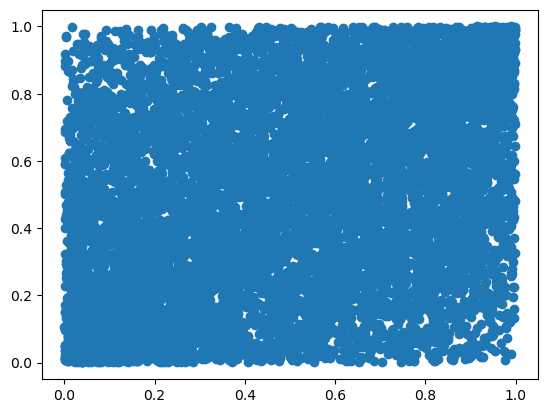

In [430]:
plt.plot(U[:, 0], U[:, 1], 'o')

## Density of Norm Copula

In [431]:
a = np.linspace(0.01, 0.99, 30)
x, y = np.meshgrid(a, a)

In [432]:
dens_norm_cp= norm_copula.density(x.ravel(), y.ravel()).reshape(x.shape)

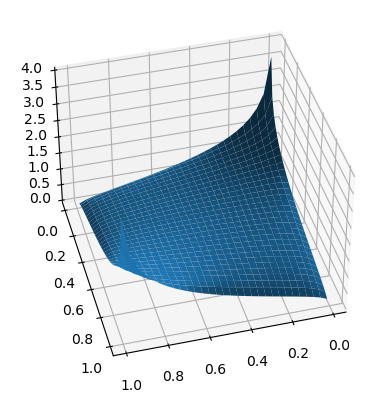

In [433]:
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, dens_norm_cp)
ax.set_zlim3d(0,4)
#ax.set_ylim3d(0.1,0.95)
#ax.set_xlim3d(0.1,0)
ax.view_init(40,75)

## T-Copula

In [434]:
class t_copula():
    def __init__(self, **kwargs):
        #super().__init__(self, seed = kwargs['random_seed'])
        #self.num_sims = kwargs['num_sims']
        self.random_state = kwargs['random_seed']
        self.correl = kwargs['correl']
        self.correl_mat = np.array([[1.0, self.correl], [self.correl, 1.0]])
        self.dof = kwargs['dof']
        self.t_frzn = t(self.dof)
        self.multi_t_frzn = multivariate_t(shape=self.correl_mat, df = self.dof)
    
    def rvs(self, size):
        np.random.seed(self.random_state)
        norm_rvs = self.multi_t_frzn.rvs(size=size)
        
        res = self.t_frzn.cdf(norm_rvs)
        return res
        
    def density(self, u, v):
        ninv_u = self.t_frzn.ppf(u)
        ninv_v = self.t_frzn.ppf(v)
        density = self.multi_t_frzn.pdf(np.c_[ninv_u, ninv_v])/(self.t_frzn.pdf(ninv_u) * self.t_frzn.pdf(ninv_v))
        return density        

In [435]:
kwargs = {'random_seed': 42, 'correl': 0.3, 'dof': 4}
t_cp = t_copula(**kwargs)

In [436]:
U = t_cp.rvs(size=10000)

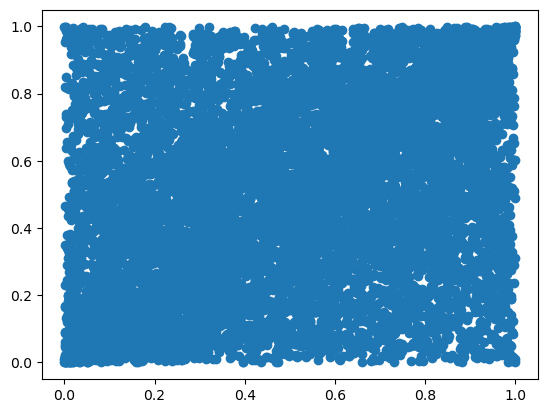

In [437]:
plt.plot(U[:,0], U[:, 1], 'o')

In [438]:
denst = t_cp.density(x.ravel(), y.ravel()).reshape(x.shape)

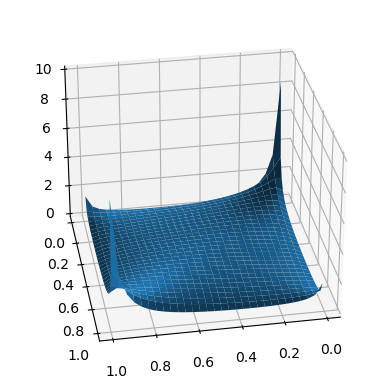

In [439]:
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, denst)
ax.set_zlim3d(0,10)
#ax.set_ylim3d(0.1,0.95)
#ax.set_xlim3d(0.1,0)
ax.view_init(30,80)

**<font color=red> TODO**: <font color=red> **class for implicit Copulae!!!**

In [64]:
cp.random_state == cp._random_state

True

In [191]:
cp.random_state = 10

In [192]:
cp._random_state

RandomState(MT19937) at 0x281B6DAF540

In [193]:
cp.random_state

RandomState(MT19937) at 0x281B6DAF540

<font color = red> TODO: stuy codes for scipy classes -> mimic!

## Excursion: 
**kwargs
*args

In [1]:
def sum_(*args):
    sum=0
    for term in args:
        sum +=term
    return sum

In [2]:
args = (1,2,3,4,5)
sum_(*args)

15

In [3]:
def test_kwargs(**kwargs):
    for key, value in kwargs.items():
        print ("{}={}".format(key, value))

In [4]:
test_kwargs(**dict(FirstName="John", LastName="Tiery"))


FirstName=John
LastName=Tiery


In [59]:
class email_name():
    def __init__(self, firstname, lastname):
        self.firstname = firstname
        self.lastname = lastname
    @property
    def email(self):
        return '{}.{}@email.com'.format(self.firstname, self.lastname)
    @property
    def fullname(self):
        return "{} {}".format(self.firstname, self.lastname)
    @fullname.setter
    def fullname(self, name):
        first, last = name.split(' ')
        self.firstname = first
        self.lastname = last
    def set_name(self, name):
        first, last = name.split(' ')
        self.firstname = first
        self.lastname = last
    
    def __repr__(self):
        return "email_name('{}', '{}')".format(self.firstname, self.lastname)


In [60]:
en = email_name('John', 'Smith')
en.email

'John.Smith@email.com'

In [56]:
en.fullname

'Jo Ho'

In [55]:
en.fullname = "Jo Ho"

In [48]:
en.set_name('Jo Ho')

In [57]:
en.email

'Jo.Ho@email.com'

In [61]:
en

email_name('John', 'Smith')

In [67]:
9+5

14

In [63]:
_

14

In [68]:
_+9

23

In [68]:
from functools import wraps

def debug(func):
    @wraps(func)
    def out(*args, **kwargs):
        print(func.__name__)
        return func(*args, **kwargs)
    return out

In [69]:
@debug
def add(x, y):
    return x+y

In [70]:
add.__name__

'add'

In [71]:
# Learn more about Python decorator

In [72]:
def add(x, y):
    return x + y
def calc(func, x, y):
    return func(x, y)

In [73]:
calc(add, 2, 5)

7

In [108]:
def decorator(func):
    def wrapper(num):
        print("Something is happening before the function is called:")
        print(func(num))
        #print("Something is happening after the function is called")
    return wrapper 

In [109]:
@decorator
def test_func(num):
    return num**2


In [110]:
test_func(10)

Something is happening before the function is called:
100


In [119]:
### try to reengineer @property decorator
def try_prop(func):
    def func_to_atr():
        return func()
    return func_to_atr

In [152]:
@property
def sq():
    return 2*3
sq

In [147]:
sq

<function __main__.sq()>

In [236]:
rho = 0.5

In [237]:
P = np.array([[1.0, rho], [rho,1.0]])

In [238]:
A = np.linalg.cholesky(P)

In [239]:
z = np.random.standard_normal((N,2))
x = A@z.T
x = x.T
x.shape

(50000, 2)

In [240]:
u = norm.cdf(x)

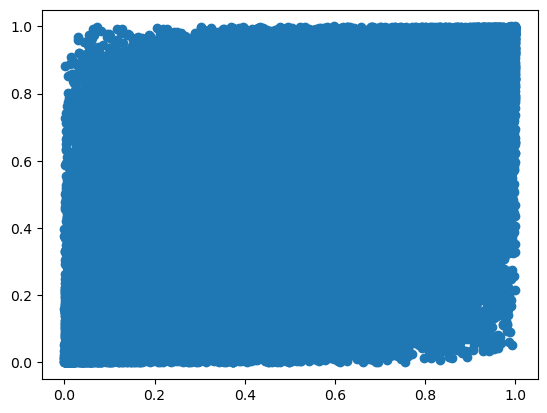

In [241]:
plt.plot(u[:,0], u[:,1],'o')

### Test empirical cdf inversion

In [245]:
from scipy.stats import pareto

In [246]:
pareto_frzn = pareto(b=2, scale=1)

$F^{-1}(Copula)$

In [267]:
exact_rv = pareto_frzn.ppf(u)

In [268]:
np.corrcoef(exact_rv.T)

array([[ 1.        , -0.01438011],
       [-0.01438011,  1.        ]])

In [269]:
from scipy import stats

In [270]:
res = stats.kendalltau(exact_rv[:,0], exact_rv[:,1])

In [271]:
res.correlation

0.030762762762762765

In [252]:
res_org = stats.kendalltau(x[:,0],x[:,1])

In [253]:
res_org.correlation

0.033122736158736156

### empirical inverse CDF NOW

In [272]:
idx = u.argsort(axis=0).argsort(axis=0)

In [273]:
pareto_rv = pareto_frzn.rvs(size=(N,2))

In [274]:
pareto_rv.sort(axis=0)

In [275]:
idx

array([[207, 836],
       [228, 249],
       [492, 441],
       ...,
       [605, 630],
       [838, 815],
       [140,  70]], dtype=int64)

In [276]:
pa_temp = pareto_rv[idx,[0,1]]

In [279]:
pa_temp - exact_rv

array([[-1.60837102e-02,  3.75360210e-02],
       [-1.03197413e-02,  8.94884834e-05],
       [-2.34546053e-02,  1.11498341e-02],
       ...,
       [-4.36367607e-02,  7.00818668e-02],
       [-8.90252734e-02,  9.42136219e-02],
       [-9.04161915e-03,  3.76092803e-03]])

In [277]:
res_empi = stats.kendalltau(pa_temp[:,0], pa_temp[:,1])

In [278]:
res_empi.correlation

0.030762762762762765

### Testing the relation:
$ \rho_\tau = \frac{2}{\Pi} arcsin(\rho)$

In [169]:
2/np.pi*np.arcsin(rho)

0.4096655293982669

In [6]:
from scipy.stats import multivariate_normal

In [193]:
rho = 0.85
P = np.array([[1.0, rho], [rho,1.0]])
dist = multivariate_normal(cov=P)

In [194]:
def gaussian_copula_density(u,v):
    dist = multivariate_normal(cov=P)
    return dist.pdf(np.c_[norm.ppf(u), norm.ppf(v)])/(norm.pdf(norm.ppf(u))*norm.pdf(norm.ppf(v)))


In [195]:
a = np.linspace(0.001, 0.999,num=100)

In [196]:
X, Y = np.meshgrid(a,a)

In [197]:
Z = np.c_[X.ravel(),Y.ravel()]
###


In [198]:
pdf = gaussian_copula_density(X.ravel(), Y.ravel()).reshape(X.shape)
pdf.round(2)

array([[152.72,  21.12,   7.86, ...,   0.  ,   0.  ,   0.  ],
       [ 21.12,  21.02,  14.71, ...,   0.  ,   0.  ,   0.  ],
       [  7.86,  14.71,  12.62, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  12.62,  14.71,   7.86],
       [  0.  ,   0.  ,   0.  , ...,  14.71,  21.02,  21.12],
       [  0.  ,   0.  ,   0.  , ...,   7.86,  21.12, 152.72]])

<a list of 2 text.Text objects>

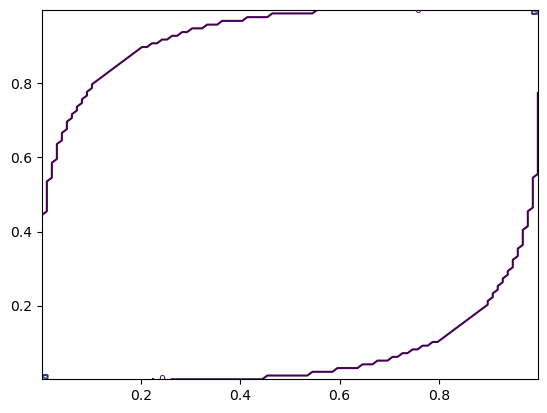

In [199]:
cs = plt.contour(X, Y, pdf.round(2))
plt.clabel(cs, inline=1, fontsize=8)

In [200]:
pdf.shape

(100, 100)

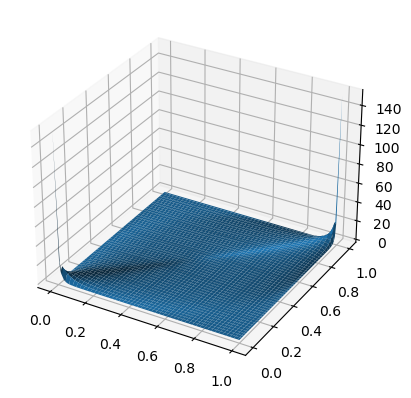

In [201]:
ax = plt.axes(projection='3d')
#Z = X**2 + Y**2
ax.plot_surface(X, Y, pdf)
#ax.set_zlim3d(0, 5) 
#levels = np.linspace(0,5,10)
#plt.contourf(X, Y, pdf, levels=levels)
#plt.colorbar()
#plt.clim(0,1.5);
plt.show()

## T-Copula

In [63]:
from scipy.stats import t as tdist
#import scipy.linalg.cholesky

In [64]:
dof = 3
rho = 0.8
N = 50000

In [65]:
P = np.array([[1, rho], [rho, 1]])
A = np.linalg.cholesky(P)


In [66]:
Z = norm.rvs(size=(2,N))
X = A@Z

In [67]:
from scipy.stats import chi2

In [68]:
R = chi2.rvs(df= dof, size=N)


In [69]:
U = np.array([tdist.cdf(X[0]/np.sqrt(R/dof), df = dof), tdist.cdf(X[1]/np.sqrt(R/dof), df=dof)])
U.shape

(2, 50000)

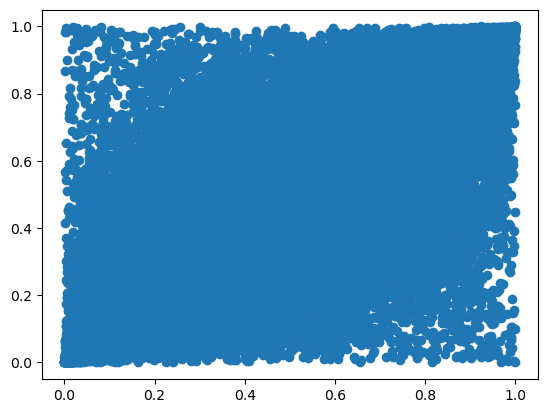

In [70]:
plt.plot(U[0],U[1], 'o')

In [71]:
a = np.linspace(1e-6, 1-1e-6, 51)
x, y = np.meshgrid(a, a)


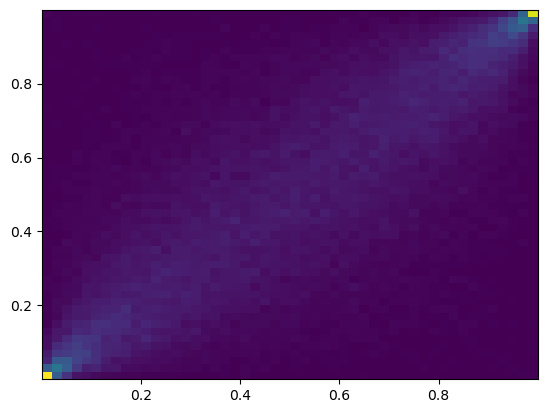

In [72]:
den=plt.hist2d(U[0], U[1], bins = 50)

In [73]:
den

(array([[597., 176.,  60., ...,   0.,   0.,   6.],
        [173., 231., 162., ...,   3.,   3.,   2.],
        [ 85., 174., 165., ...,   2.,   1.,   1.],
        ...,
        [  1.,   4.,   1., ..., 166., 153.,  68.],
        [  3.,   1.,   0., ..., 179., 230., 189.],
        [  3.,   1.,   2., ...,  77., 190., 564.]]),
 array([3.27075510e-05, 2.00316677e-02, 4.00306279e-02, 6.00295880e-02,
        8.00285482e-02, 1.00027508e-01, 1.20026468e-01, 1.40025429e-01,
        1.60024389e-01, 1.80023349e-01, 2.00022309e-01, 2.20021269e-01,
        2.40020229e-01, 2.60019190e-01, 2.80018150e-01, 3.00017110e-01,
        3.20016070e-01, 3.40015030e-01, 3.60013990e-01, 3.80012951e-01,
        4.00011911e-01, 4.20010871e-01, 4.40009831e-01, 4.60008791e-01,
        4.80007751e-01, 5.00006712e-01, 5.20005672e-01, 5.40004632e-01,
        5.60003592e-01, 5.80002552e-01, 6.00001512e-01, 6.20000472e-01,
        6.39999433e-01, 6.59998393e-01, 6.79997353e-01, 6.99996313e-01,
        7.19995273e-01, 7.39994

In [74]:
dens = np.meshgrid(den[1], den[2])
dens[1].shape


(51, 51)

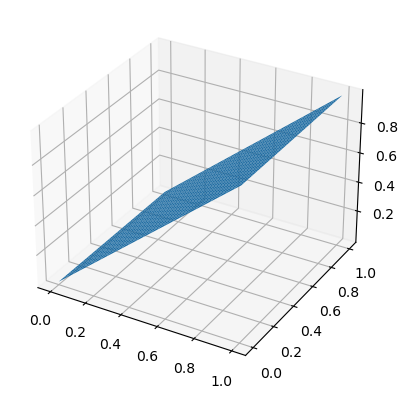

In [75]:
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,dens[0])

### Density of a Copula via Exact Formulae

In [168]:
from scipy.stats import multivariate_t, multivariate_normal, norm, t

In [169]:
norm.pdf(0)

0.3989422804014327

In [333]:
def norm_copula_density(u, v, rho):
    corr_mat = np.array([[1, rho], [rho, 1]])
    multi_norm_frzn = multivariate_normal(cov=corr_mat)
    ninv_u = norm.ppf(u)
    ninv_v = norm.ppf(v)
    density = multi_norm_frzn.pdf(np.c_[ninv_u, ninv_v])/(norm.pdf(ninv_u) * norm.pdf(ninv_v))
    return density

In [413]:
def t_copula_density(u,v,dof,rho):
    corr_mat = np.array([[1, rho], [rho, 1]])
    multi_t_frzn = multivariate_t(shape=corr_mat, df=dof)
    t_frzn = t(df=dof)
    ##
    tinv_u = t_frzn.ppf(u)
    tinv_v = t_frzn.ppf(v)
    density = multi_t_frzn.pdf(np.c_[tinv_u, tinv_v])/(t_frzn.pdf(tinv_u)*t_frzn.pdf(tinv_v))
    return density
    

In [414]:
a = np.linspace(0.01, 0.99, 30)
x, y = np.meshgrid(a,a)

In [415]:
rho=0.3
dof=4

In [416]:
densn = norm_copula_density(x.ravel(), y.ravel(), rho).reshape(x.shape)

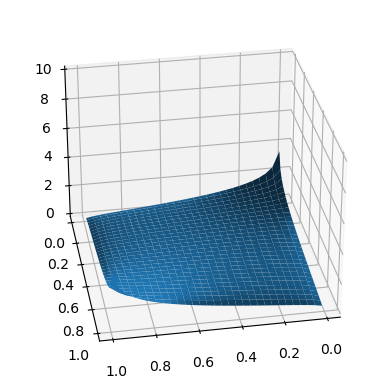

In [417]:
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, densn)
ax.set_zlim3d(0,10)
#ax.set_ylim3d(0.1,0.95)
#ax.set_xlim3d(0.1,0)
ax.view_init(30,80)

In [418]:
denst = t_copula_density(x.ravel(), y.ravel(), dof=dof, rho=rho).reshape(x.shape)

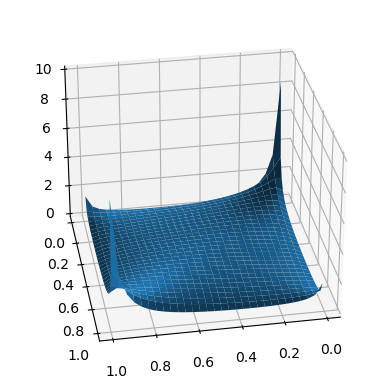

In [419]:
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, denst)
ax.set_zlim3d(0,10)
#ax.set_ylim3d(0.1,0.95)
#ax.set_xlim3d(0.1,0)
ax.view_init(30,80)


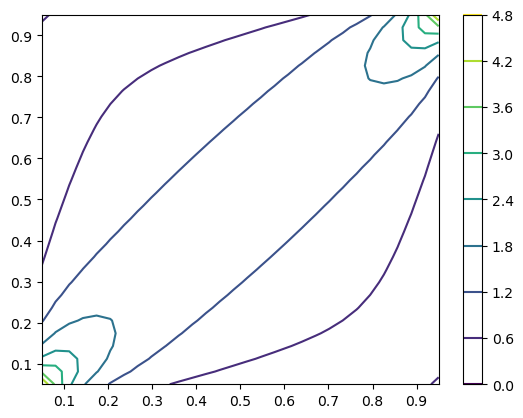

In [360]:
plt.contour(x,y,dens)
plt.colorbar()

In [433]:
idx = copu.argsort(axis=1).argsort(axis=1)

In [434]:
idx

array([[28905, 45838, 49076, ...,  8906, 35750, 21325],
       [ 9811, 44410, 47493, ..., 11224, 42218, 37362]], dtype=int64)

In [338]:
A = np.array([[1.2,3.2,2.3],[1,4.4,0.3]])

In [339]:
A

array([[1.2, 3.2, 2.3],
       [1. , 4.4, 0.3]])

In [341]:
A.argsort(axis=0)#.argsort(axis=0)

array([[1, 0, 1],
       [0, 1, 0]], dtype=int64)

In [435]:
corr_norm0 = norm.ppf(U)

In [436]:
np.corrcoef(corr_norm0)

array([[1.       , 0.7900536],
       [0.7900536, 1.       ]])

In [437]:
U.sort(axis=1)

In [438]:
U.shape

(2, 50000)

In [439]:
U

array([[6.83703659e-06, 2.42249703e-05, 5.14621696e-05, ...,
        9.99868404e-01, 9.99967167e-01, 9.99999643e-01],
       [7.92775877e-06, 1.83255524e-05, 3.89418924e-05, ...,
        9.99924458e-01, 9.99966718e-01, 9.99997651e-01]])

In [440]:
idx.shape

(2, 50000)

In [441]:
corr_norm1 = np.array([U[0,idx[0]], U[1,idx[1]]])

In [442]:
np.corrcoef(corr_norm1)

array([[1.        , 0.76929224],
       [0.76929224, 1.        ]])

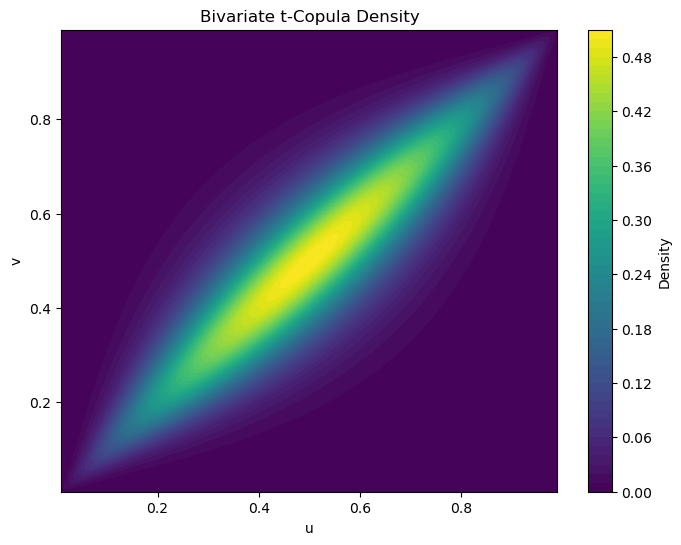

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, multivariate_t

# Parameters for the t-copula
df = 4  # degrees of freedom
rho = 0.95  # correlation coefficient

# Define the correlation matrix
corr_matrix = np.array([[1, rho], [rho, 1]])

# Grid of u values
u = np.linspace(0.01, 0.99, 100)
U, V = np.meshgrid(u, u)

# Convert U, V to t-distribution quantiles
x = t.ppf(U, df)
y = t.ppf(V, df)

# Calculate the multivariate t-density
pos = np.dstack((x, y))
rv = multivariate_t([0, 0], corr_matrix, df)
density = rv.pdf(pos)

# Plot the density
plt.figure(figsize=(8, 6))
plt.contourf(U, V, density, levels=50, cmap='viridis')
plt.colorbar(label='Density')
plt.title('Bivariate t-Copula Density')
plt.xlabel('u')
plt.ylabel('v')
plt.show()

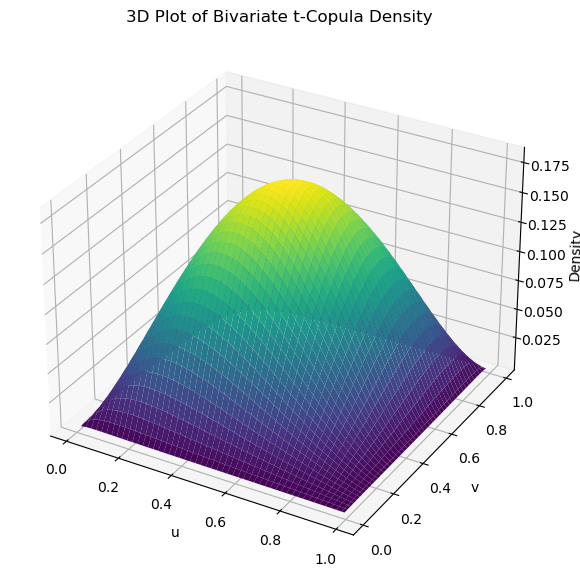

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, multivariate_t
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the t-copula
df = 4  # degrees of freedom
rho = 0.5  # correlation coefficient

# Define the correlation matrix
corr_matrix = np.array([[1, rho], [rho, 1]])

# Grid of u values
u = np.linspace(0.01, 0.99, 100)
U, V = np.meshgrid(u, u)

# Convert U, V to t-distribution quantiles
x = t.ppf(U, df)
y = t.ppf(V, df)

# Calculate the multivariate t-density
pos = np.dstack((x, y))
rv = multivariate_t([0, 0], corr_matrix, df)
density = rv.pdf(pos)

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(U, V, density, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('Density')
ax.set_title('3D Plot of Bivariate t-Copula Density')

plt.show()

## More on Pareto distribution

In [280]:
pareto_frzn = pareto(b=1, scale=1.161)

In [281]:
pareto_frzn.ppf(0.8)

5.8050000000000015

In [288]:
pareto_frzn.ppf(0.2)

1.45125

In [289]:
pa = pareto_frzn.rvs(size=1000)

(array([934.,  29.,  14.,   5.,   3.,   2.,   0.,   2.,   1.,   0.,   2.,
          2.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.16312241e+00, 1.85817377e+01, 3.60003530e+01, 5.34189683e+01,
        7.08375836e+01, 8.82561990e+01, 1.05674814e+02, 1.23093430e+02,
        1.40512045e+02, 1.57930660e+02, 1.75349276e+02, 1.92767891e+02,
        2.10186506e+02, 2.27605121e+02, 2.45023737e+02, 2.62442352e+02,
        2.79860967e+02, 2.9727

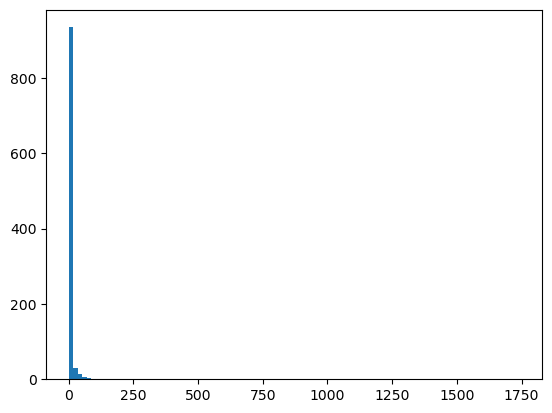

In [292]:
plt.hist(pa, bins=100)

In [303]:
x = np.linspace(-1000,1000,100)

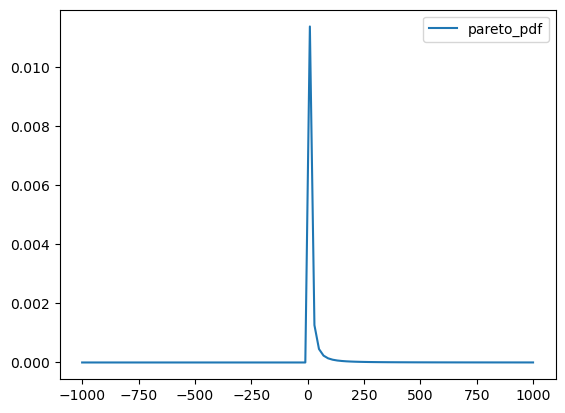

In [309]:
plt.plot(x, pareto_frzn.pdf(x), label='pareto_pdf')
#plt.plot(x, norm.pdf(x), label='normal_pdf')
#plt.xlim([0,100])
plt.legend()

### On the 80-20 principle:

Average wealth of the population: $E[X] = \frac{\alpha}{\alpha-1} x_m$.

Average wealth of population exceeding certain threshold $t$:
$\mathbf{E}[X 1_{X>t}] = \frac{\alpha}{\alpha-1} \frac{x_m^{\alpha}}{t^{\alpha-1}}$

Now if $t$ satisfies $P(X>t) = 0.2$, i.e. only 20% of the population has more than $t$ amount of wealth. Then $\frac{x_m^\alpha}{t^\alpha} = 0.2$. Moreover, on average, the amount of wealth possessed by the above 20% of the population in relation to total wealth is:

\begin{equation}
  \label{eq1}  
  \frac{\mathbf{E}[X 1_{X>t}]}{\mathbf{E}[X]} = (\frac{x_m}{t})^{\alpha-1} = 0.8.
\end{equation}

Solving the above equations yields: $\alpha = log_4(5)$ will satisfy the 80-20 principle - 80% of wealth is owned by 20% of the population.

https://www.tiktok.com/@thutram0605/video/6977704025428987138